# Batter Clustering
The purpose of this notebook is to go through my process of collecting hitter statistical data and running clustering on it.  The goal is to have a clustering of hitters, in order to use the cluster assignments as features in a machine learning algorithm for pitch predictions.  

The thought behind doing it this way is that pitchers will likely pitch to similar hitters in similar ways.  This will also reduce dimensions over a method such as using hitter names as features.

Importing various packages:

In [2]:
import pickle
from sqlalchemy import create_engine
import pandas as pd
from importlib import reload
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import seaborn as sns
%config InlineBackend.figure_formats = ['retina']
%matplotlib inline

plt.rcParams['figure.figsize'] = (9, 6)
sns.set(context='notebook', style='whitegrid', font_scale=1.2)

For this

In [3]:
pwd

'/Users/patrickbovard/Documents/GitHub/metis_final_project/Clustering'

# Initial Clustering - Baseball Savant Leaderboard

Importing in hitter stats:

In [4]:
stats_df = pd.read_csv('../Data/hitter_stats.csv')

In [5]:
stats_df.head()

,last_name,first_name,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,isolated_power,exit_velocity_avg,...,z_swing_percent,oz_swing_percent,oz_swing_miss_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,Unnamed: 22
0,Colon,Bartolo,2017,50.0,0.0,0.000,0.000,0.000,0.000,78.0,...,57.6,58.1,38.9,52.6,37.8,57.8,50.0,20.0,30.0,NaN
1,Beltre,Adrian,2017,13.4,10.0,0.312,0.532,0.383,0.221,86.7,...,66.9,29.4,28.9,86.6,18.7,46.8,34.0,40.5,25.5,NaN
2,Beltran,Carlos,2017,20.0,6.5,0.231,0.383,0.283,0.152,87.3,...,66.5,32.4,35.0,89.2,19.8,47.9,41.8,36.9,20.8,NaN
3,Werth,Jayson,2017,23.9,12.1,0.226,0.393,0.322,0.167,88.1,...,56.8,20.2,42.7,85.3,21.9,38.6,39.7,37.0,23.4,NaN
4,Arroyo,Bronson,2017,34.5,0.0,0.154,0.154,0.138,0.000,82.4,...,56.9,37.5,50.0,69.0,23.8,50.0,15.8,57.9,26.3,NaN


In [6]:
stats_df[stats_df.last_name == 'Trout']

,last_name,first_name,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,isolated_power,exit_velocity_avg,...,z_swing_percent,oz_swing_percent,oz_swing_miss_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,Unnamed: 22
362,Trout,Mike,2017,17.8,18.5,0.306,0.629,0.442,0.323,88.8,...,58.9,18.8,36.7,88.3,18.2,37.7,37.0,39.2,23.7,NaN
1230,Trout,Mike,2015,23.2,13.5,0.299,0.590,0.402,0.290,92.9,...,54.0,22.3,36.4,84.7,22.0,37.4,35.1,35.5,29.4,NaN
1876,Trout,Mike,2016,20.1,17.0,0.315,0.550,0.441,0.235,90.9,...,57.4,21.6,33.2,84.7,20.7,38.3,37.9,36.2,25.9,NaN
2440,Trout,Mike,2018,20.4,20.1,0.312,0.628,0.459,0.316,91.2,...,57.8,18.0,43.8,89.3,18.6,37.6,39.0,37.9,22.8,NaN
3095,Trout,Mike,2019,20.0,18.3,0.291,0.645,0.438,0.353,90.9,...,57.8,17.8,36.1,86.7,19.2,36.8,41.5,34.7,23.7,NaN


In [7]:
stats_df.drop(columns=['Unnamed: 22'], inplace=True)

In [8]:
stats_df.isnull().sum()

last_name                0
 first_name              0
year                     0
b_k_percent              0
b_bb_percent             0
batting_avg              0
slg_percent              0
on_base_percent          0
isolated_power           0
exit_velocity_avg        1
launch_angle_avg         1
barrel_batted_rate       0
poorlyweak_percent       0
z_swing_percent          0
oz_swing_percent         0
oz_swing_miss_percent    1
iz_contact_percent       0
whiff_percent            0
swing_percent            0
pull_percent             0
straightaway_percent     0
opposite_percent         0
dtype: int64

In [9]:
stats_df.dropna(inplace=True)

Importing packages needed for K-Means clustering.

In [10]:
from sklearn.preprocessing import scale
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler

In [11]:
X = stats_df.iloc[:,2:]

#Standard Scaling the data:
std = StandardScaler()
X_scaled = std.fit_transform(X)

Looking at Inertia of the clustering to try to find an ideal number:

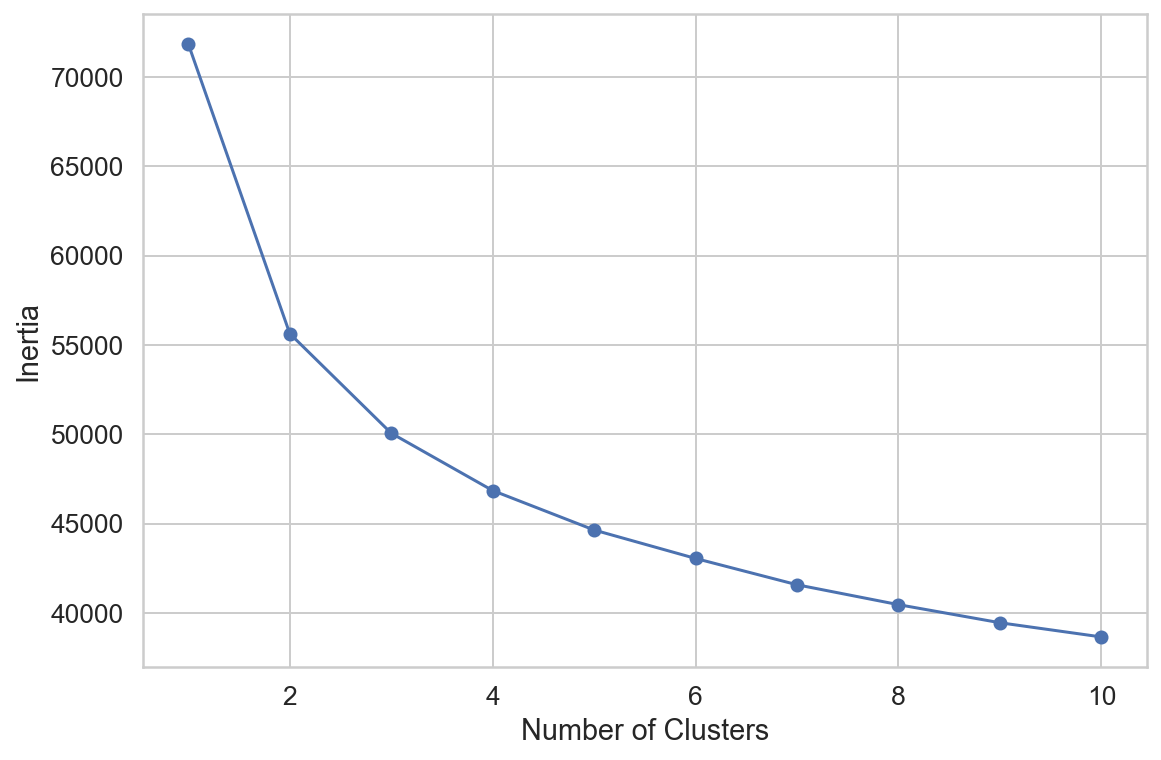

In [12]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(X_scaled)
    inertia.append(km.inertia_)
    
plt.plot(list_num_clusters,inertia)
plt.scatter(list_num_clusters,inertia)
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia');

Based on the above, I'd saw after 3 or 4 you start to have diminishing returns.  Running with 3 first:

In [13]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters,random_state=10,n_init=1) # n_init, number of times the K-mean algorithm will run
km.fit(X_scaled)

KMeans(n_clusters=3, n_init=1, random_state=10)

Taking a look at the cluster assignments:

In [14]:
assignments = km.labels_

In [15]:
assignments.shape

(3593,)

Mapping those assignments back onto the original dataset to see how the hitters were clustered:

In [16]:
stats_df.shape

(3593, 22)

In [17]:
stats_df['Cluster'] = assignments

In [18]:
stats_df.head()

,last_name,first_name,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,isolated_power,exit_velocity_avg,...,z_swing_percent,oz_swing_percent,oz_swing_miss_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,Cluster
0,Colon,Bartolo,2017,50.0,0.0,0.000,0.000,0.000,0.000,78.0,...,57.6,58.1,38.9,52.6,37.8,57.8,50.0,20.0,30.0,1
1,Beltre,Adrian,2017,13.4,10.0,0.312,0.532,0.383,0.221,86.7,...,66.9,29.4,28.9,86.6,18.7,46.8,34.0,40.5,25.5,2
2,Beltran,Carlos,2017,20.0,6.5,0.231,0.383,0.283,0.152,87.3,...,66.5,32.4,35.0,89.2,19.8,47.9,41.8,36.9,20.8,2
3,Werth,Jayson,2017,23.9,12.1,0.226,0.393,0.322,0.167,88.1,...,56.8,20.2,42.7,85.3,21.9,38.6,39.7,37.0,23.4,0
4,Arroyo,Bronson,2017,34.5,0.0,0.154,0.154,0.138,0.000,82.4,...,56.9,37.5,50.0,69.0,23.8,50.0,15.8,57.9,26.3,1


Scoping out some of the clusters made:

### Cluster 1:

In [19]:
cluster_1 = stats_df[stats_df.Cluster == 1]

In [20]:
cluster_1.sample(10)

,last_name,first_name,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,isolated_power,exit_velocity_avg,...,z_swing_percent,oz_swing_percent,oz_swing_miss_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,Cluster
3225,Palka,Daniel,2019,37.6,8.6,0.107,0.179,0.194,0.071,87.4,...,69.5,38.6,53.0,70.7,39.5,52.2,36.7,49.0,14.3,1
3494,Soroka,Mike,2019,34.9,3.2,0.077,0.077,0.127,0.000,79.1,...,61.3,43.9,48.8,65.8,26.7,53.5,13.5,35.1,51.4,1
731,Vogelsong,Ryan,2015,28.9,2.2,0.139,0.250,0.133,0.111,81.3,...,53.2,37.3,39.3,78.0,23.9,45.8,16.1,41.9,41.9,1
2228,Richard,Clayton,2018,47.1,3.9,0.095,0.190,0.137,0.095,85.8,...,67.0,42.5,58.8,61.0,39.8,55.4,37.5,41.7,20.8,1
3589,Noll,Jake,2019,30.8,7.7,0.167,0.250,0.231,0.083,78.0,...,68.4,50.0,53.8,92.3,30.8,57.8,50.0,25.0,25.0,1
3201,Syndergaard,Noah,2019,68.1,4.3,0.092,0.200,0.130,0.108,88.2,...,75.2,41.2,75.9,52.6,53.0,58.1,26.3,57.9,15.8,1
3139,Mikolas,Miles,2019,43.5,0.0,0.136,0.153,0.129,0.017,81.6,...,68.2,58.0,54.9,60.3,44.6,64.0,28.6,48.6,22.9,1
1776,Moore,Matt,2016,37.1,0.0,0.097,0.097,0.086,0.000,82.6,...,64.8,40.9,61.1,68.6,37.7,54.5,13.6,40.9,45.5,1
3310,Fedde,Erick,2019,30.0,0.0,0.133,0.133,0.100,0.000,81.5,...,58.3,23.8,60.0,75.0,18.2,47.8,7.1,42.9,50.0,1
749,Peavy,Jake,2015,41.5,2.4,0.194,0.333,0.195,0.139,87.4,...,72.6,33.3,57.1,60.7,34.5,54.7,34.8,39.1,26.1,1


In [21]:
cluster_1.describe()

,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,isolated_power,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,...,z_swing_percent,oz_swing_percent,oz_swing_miss_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,Cluster
count,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,...,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.000000,644.0
mean,2016.978261,41.371273,3.366304,0.109273,0.134803,0.134106,0.025536,83.280280,0.548602,0.940839,...,62.510093,36.085559,51.102795,67.695963,33.112112,50.654037,23.886491,41.177640,34.913043,1.0
std,1.430449,12.638761,4.130657,0.063874,0.084287,0.067374,0.038878,4.789377,12.257068,2.761419,...,9.988108,11.653209,16.291662,11.030771,9.689672,8.669994,14.197605,13.930722,15.473587,0.0
min,2015.000000,6.800000,0.000000,0.000000,0.000000,0.000000,0.000000,65.000000,-37.100000,0.000000,...,28.000000,4.000000,0.000000,28.600000,0.000000,22.400000,0.000000,0.000000,0.000000,1.0
25%,2016.000000,33.300000,0.000000,0.067000,0.077000,0.089750,0.000000,80.675000,-7.200000,0.000000,...,56.300000,28.400000,41.700000,61.100000,26.900000,44.900000,14.300000,33.300000,25.000000,1.0
50%,2017.000000,40.000000,2.100000,0.103000,0.125000,0.130000,0.000000,83.400000,-0.300000,0.000000,...,63.200000,35.450000,50.350000,68.650000,32.550000,50.750000,22.550000,40.500000,33.300000,1.0
75%,2018.000000,50.000000,5.525000,0.154000,0.190000,0.176000,0.038250,86.600000,8.250000,0.000000,...,69.700000,43.800000,60.175000,75.000000,39.100000,56.325000,32.775000,50.000000,45.275000,1.0
max,2019.000000,83.300000,25.000000,0.333000,0.462000,0.435000,0.231000,97.700000,42.700000,33.300000,...,88.000000,88.200000,100.000000,100.000000,63.400000,79.200000,100.000000,100.000000,100.000000,1.0


Interestingly enough, these are all mainly pitchers listed.  In otherwords, very poor/light hitters.  Based on the stats, they tend to have low average, strikeout a ton, and swing and miss a lot.

### Cluster 2:

In [22]:
cluster_2 = stats_df[stats_df.Cluster == 2]

In [23]:
cluster_2.sample(10)

,last_name,first_name,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,isolated_power,exit_velocity_avg,...,z_swing_percent,oz_swing_percent,oz_swing_miss_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,Cluster
2406,Grossman,Robbie,2018,17.8,12.9,0.273,0.384,0.366,0.111,87.1,...,62.7,16.8,41.9,90.9,16.3,39.3,33.8,37.8,28.4,2
1687,Ramirez,Alexei,2016,12.5,4.2,0.241,0.333,0.277,0.092,84.5,...,65.0,32.6,28.3,88.8,16.6,48.6,40.9,38.8,20.3,2
1158,Perez,Hernan,2015,21.7,1.8,0.243,0.327,0.254,0.084,86.3,...,74.1,40.9,36.9,78.0,26.2,57.9,31.7,38.5,29.8,2
1189,Herrmann,Chris,2015,32.7,6.2,0.146,0.272,0.212,0.126,86.7,...,70.2,36.2,64.6,80.8,33.5,52.9,41.8,28.4,29.9,2
612,Plawecki,Kevin,2017,14.4,11.9,0.260,0.400,0.364,0.140,87.1,...,68.6,25.5,36.1,83.5,21.8,47.0,34.5,48.8,16.7,2
3086,Wong,Kolten,2019,15.1,8.6,0.285,0.423,0.357,0.138,86.2,...,67.7,29.8,33.2,87.4,18.2,48.0,34.5,40.9,24.6,2
1001,Tolleson,Steve,2015,20.0,8.9,0.268,0.439,0.333,0.171,82.4,...,58.8,23.0,21.4,85.1,16.1,43.4,34.4,40.6,25.0,2
486,Williams,Mason,2017,11.8,5.9,0.250,0.250,0.294,0.000,87.5,...,75.8,27.3,25.0,76.0,21.6,48.1,42.9,42.9,14.3,2
2572,Brito,Socrates,2018,20.5,6.8,0.175,0.250,0.227,0.075,88.8,...,64.3,38.4,36.4,81.5,24.4,51.4,28.1,43.8,28.1,2
2441,Herrera,Odubel,2018,20.4,6.4,0.255,0.420,0.310,0.165,87.1,...,69.2,38.3,43.3,81.3,27.3,52.4,36.7,35.3,27.9,2


In [24]:
cluster_2.describe()

,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,isolated_power,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,...,z_swing_percent,oz_swing_percent,oz_swing_miss_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,Cluster
count,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,...,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000,1563.0
mean,2016.713372,19.415483,6.843250,0.240759,0.350951,0.295981,0.110189,86.583557,9.900192,2.970569,...,66.106846,29.487076,35.765451,85.021561,20.652911,47.708957,34.219962,38.643570,27.123800,2.0
std,1.370905,6.252678,3.344877,0.049202,0.084677,0.052598,0.052063,2.466714,5.440232,2.277720,...,6.488067,7.036106,9.897778,5.298770,5.482603,5.515908,7.880526,6.939413,6.674399,0.0
min,2015.000000,0.000000,0.000000,0.000000,0.000000,0.067000,0.000000,75.700000,-26.900000,0.000000,...,36.800000,6.300000,0.000000,65.500000,0.000000,29.300000,0.000000,0.000000,0.000000,2.0
25%,2015.000000,15.300000,4.800000,0.214000,0.300000,0.267000,0.077000,85.200000,6.800000,1.000000,...,61.900000,24.650000,29.500000,81.800000,16.900000,44.100000,29.800000,35.300000,23.300000,2.0
50%,2017.000000,19.000000,6.600000,0.248000,0.358000,0.301000,0.111000,86.800000,10.000000,2.800000,...,66.200000,29.200000,35.700000,85.500000,20.700000,47.500000,34.500000,38.400000,26.700000,2.0
75%,2018.000000,23.300000,8.800000,0.273000,0.411000,0.330000,0.146000,88.200000,13.300000,4.650000,...,70.400000,34.100000,41.850000,88.700000,24.300000,51.400000,38.600000,41.800000,30.600000,2.0
max,2019.000000,44.000000,28.600000,0.444000,0.667000,0.500000,0.333000,95.100000,31.400000,11.100000,...,88.000000,58.600000,100.000000,100.000000,38.100000,68.300000,72.700000,77.800000,62.500000,2.0


These hitters appear to be more contact-oriented.

### Cluster 0:

In [25]:
cluster_0 = stats_df[stats_df.Cluster == 0]

In [26]:
cluster_0.sample(10)

,last_name,first_name,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,isolated_power,exit_velocity_avg,...,z_swing_percent,oz_swing_percent,oz_swing_miss_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,Cluster
1597,Jennings,Desmond,2016,25.8,9.3,0.200,0.350,0.280,0.150,87.0,...,60.9,23.2,36.7,70.3,30.7,43.0,34.0,38.9,27.1,0
139,Hundley,Nick,2017,26.7,4.0,0.244,0.418,0.271,0.174,88.6,...,73.5,30.2,53.4,82.3,27.2,52.8,33.8,38.6,27.6,0
2203,Duda,Lucas,2018,27.8,7.6,0.241,0.418,0.313,0.177,89.5,...,62.0,29.4,52.9,80.0,31.8,44.4,39.7,33.6,26.6,0
2388,Villar,Jonathan,2018,26.8,8.0,0.260,0.384,0.324,0.124,88.5,...,72.2,27.7,41.6,75.0,29.3,48.9,33.2,40.8,26.0,0
1948,Garneau,Dustin,2016,29.3,8.0,0.235,0.368,0.293,0.132,85.2,...,70.9,29.5,51.3,82.1,25.7,51.1,42.6,34.0,21.3,0
663,Frazier,Clint,2017,30.3,4.9,0.231,0.448,0.268,0.216,88.7,...,75.5,22.7,62.5,81.2,28.9,49.0,40.2,33.7,26.1,0
2516,Saladino,Tyler,2018,29.5,6.5,0.246,0.397,0.295,0.151,91.3,...,57.4,23.8,43.5,74.9,30.0,41.8,42.0,40.9,17.0,0
436,Garneau,Dustin,2017,28.6,9.5,0.188,0.313,0.270,0.125,83.5,...,75.8,29.6,50.0,75.8,30.4,52.9,49.4,22.1,28.6,0
2784,Dixon,Brandon,2018,34.7,4.8,0.178,0.356,0.218,0.178,89.6,...,77.7,32.8,56.6,75.7,34.5,54.3,34.7,40.0,25.3,0
2851,Acuna Jr.,Ronald,2018,25.3,9.2,0.293,0.552,0.366,0.259,90.9,...,70.2,24.0,42.3,79.2,26.6,46.2,36.7,42.8,20.4,0


In [27]:
cluster_0.describe()

,year,b_k_percent,b_bb_percent,batting_avg,slg_percent,on_base_percent,isolated_power,exit_velocity_avg,launch_angle_avg,barrel_batted_rate,...,z_swing_percent,oz_swing_percent,oz_swing_miss_percent,iz_contact_percent,whiff_percent,swing_percent,pull_percent,straightaway_percent,opposite_percent,Cluster
count,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,...,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.000000,1386.00000,1386.000000,1386.000000,1386.0
mean,2017.338384,26.678571,9.222655,0.243989,0.442173,0.319574,0.198182,89.293867,13.546248,9.231025,...,67.719769,27.779870,47.328211,78.506566,29.053752,46.934993,39.30202,37.021501,23.655195,0.0
std,1.390088,7.356277,3.526456,0.044888,0.095386,0.048436,0.065547,2.268977,5.195555,4.228043,...,6.238872,6.485306,9.899478,6.126462,6.164446,5.261461,7.09843,6.289912,5.792429,0.0
min,2015.000000,8.300000,0.000000,0.040000,0.106000,0.136000,0.000000,79.400000,-11.300000,0.000000,...,42.900000,10.200000,12.500000,45.500000,12.000000,29.600000,10.00000,0.000000,0.000000,0.0
25%,2016.000000,21.600000,6.825000,0.220000,0.390000,0.293000,0.160000,88.000000,10.400000,6.600000,...,63.525000,23.300000,40.500000,75.000000,24.800000,43.200000,35.00000,33.900000,20.425000,0.0
50%,2018.000000,25.700000,9.100000,0.248000,0.443000,0.322000,0.195000,89.300000,13.600000,8.700000,...,67.600000,27.400000,46.550000,79.300000,28.500000,46.700000,38.90000,36.850000,23.800000,0.0
75%,2019.000000,30.500000,11.200000,0.272000,0.499000,0.350000,0.234000,90.700000,16.900000,11.200000,...,71.700000,31.700000,53.075000,82.900000,32.575000,50.100000,43.30000,40.000000,26.600000,0.0
max,2019.000000,63.300000,23.800000,0.500000,1.100000,0.552000,0.714000,103.900000,37.600000,42.900000,...,88.600000,57.100000,100.000000,94.100000,61.900000,65.100000,72.70000,80.000000,57.100000,0.0


This cluster looks to be home to more power hitters - slugging, barrel rates, etc. are higher than cluster 2, but swing and miss and strikeout rates are also higher.

While this is helpful, I am hoping to have a few changes to the hitter stats:  
- This gives player-season as a row (i.e. Mike Trout 2017 and 2018 are separate rows).  I want to have each player as their own row, since this would likely be a "scouting report" on that player. 
- I'd want to include "splits" by lefty and righty - in other words, if  hitter hits better significantly against righties as compared to lefties, they would likely be pitched to differently.  

With these needs, [the Fangraphs leaderboard](https://www.fangraphs.com/leaders.aspx?pos=all&stats=bat&lg=all&qual=y&type=5&season=2019&month=0&season1=2015&ind=0&team=0&rost=0&age=0&filter=&players=0&startdate=2015-01-01&enddate=2019-12-31) gives me the stats I need, and the ability to export as a csv.

# Fangraphs Clustering
Setting the timeline as all players from 2015-2019 with at least 100 plate appearances in that timeframe, I've created .csv files for standard stats, advanced stats, and plate disciplin stats. 

Loading those in here:

In [28]:
fg_standard_df = pd.read_csv('../Data/Fangraphs_data/fg_standard.csv')
fg_advanced_df = pd.read_csv('../Data/Fangraphs_data/fg_advanced.csv')
fg_pd_df = pd.read_csv('../Data/Fangraphs_data/fg_plate_discipline.csv')

For now, scoping out each dataset and removing columns I don't want to consider for now:

**Standard Stats:**

In [29]:
fg_standard_df.head()

,Name,Team,G,AB,PA,H,1B,2B,3B,HR,...,IBB,SO,HBP,SF,SH,GDP,SB,CS,AVG,playerid
0,Luis Arraez,MIN,92,326,366,109,84,20,1,4,...,1,29,1,3,0,2,2,2,0.334,18568
1,Jose Altuve,HOU,729,2902,3215,938,636,177,18,107,...,26,382,34,21,11,87,123,38,0.323,5417
2,Jeff McNeil,NYM,196,735,815,236,154,49,7,26,...,3,99,26,1,4,7,12,7,0.321,15362
3,Fernando Tatis Jr.,SDP,84,334,372,106,65,13,6,22,...,1,110,5,3,0,4,16,6,0.317,19709
4,Bryan Reynolds,PIT,134,491,546,154,97,37,4,16,...,0,121,6,3,0,9,3,2,0.314,19326


In [32]:
fg_standard_df.columns

Index(['Name', 'Team', 'G', 'AB', 'PA', 'H', '1B', '2B', '3B', 'HR', 'R',
       'RBI', 'BB', 'IBB', 'SO', 'HBP', 'SF', 'SH', 'GDP', 'SB', 'CS', 'AVG',
       'playerid'],
      dtype='object')

In [33]:
cols = ['Name', 'G', 'AB', 'PA', 'AVG']

In [34]:
fg_standard_use = fg_standard_df[cols]

**Advanced Stats:**

In [30]:
fg_advanced_df.head()

,Name,Team,PA,BB%,K%,BB/K,AVG,OBP,SLG,OPS,...,Spd,BABIP,UBR,wGDP,wSB,wRC,wRAA,wOBA,wRC+,playerid
0,Yordan Alvarez,HOU,369,14.1%,25.5%,0.55,0.313,0.412,0.655,1.067,...,1.1,0.366,-1.7,0.1,-0.2,82,35.8,0.432,178,19556
1,Mike Trout,LAA,3078,17.3%,20.4%,0.85,0.305,0.435,0.605,1.041,...,5.7,0.338,10.8,9.5,8.5,652,287.1,0.430,177,10155
2,David Ortiz,BOS,1240,12.7%,14.6%,0.87,0.294,0.381,0.587,0.967,...,1.5,0.288,-11.6,-3.0,-0.6,227,84.3,0.399,151,745
3,J.D. Martinez,- - -,2969,10.0%,24.2%,0.41,0.305,0.376,0.585,0.961,...,3.6,0.353,-12.9,-7.0,-0.4,554,201.4,0.399,150,6184
4,Fernando Tatis Jr.,SDP,372,8.1%,29.6%,0.27,0.317,0.379,0.590,0.969,...,7.1,0.410,1.8,0.8,0.4,72,25.2,0.398,150,19709


In [35]:
fg_advanced_df.columns

Index(['Name', 'Team', 'PA', 'BB%', 'K%', 'BB/K', 'AVG', 'OBP', 'SLG', 'OPS',
       'ISO', 'Spd', 'BABIP', 'UBR', 'wGDP', 'wSB', 'wRC', 'wRAA', 'wOBA',
       'wRC+', 'playerid'],
      dtype='object')

**Plate Discipline Stats:**

In [31]:
fg_pd_df.head()

,Name,Team,O-Swing%,Z-Swing%,Swing%,O-Contact%,Z-Contact%,Contact%,Zone%,F-Strike%,SwStr%,playerid
0,Aaron Nola,PHI,13.9%,40.6%,28.5%,43.8%,81.9%,73.4%,54.7%,65.9%,7.6%,16149
1,Jordan Lyles,- - -,14.1%,38.9%,27.6%,70.4%,67.0%,67.8%,54.2%,70.6%,8.9%,7593
2,Alex Blandino,CIN,14.7%,55.7%,33.5%,61.5%,89.0%,82.5%,45.8%,60.9%,5.9%,16271
3,Alex Avila,- - -,15.3%,61.9%,36.8%,38.4%,73.6%,65.7%,46.1%,57.6%,12.6%,7476
4,Cavan Biggio,TOR,15.8%,63.3%,35.9%,47.1%,85.6%,75.9%,42.3%,56.0%,8.7%,19252
